In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])
df = pd.read_csv('smsspamcollection/spam.csv',encoding='latin1')

In [3]:
df = df.drop(df.columns[-3:], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns = ['label', 'message']

In [5]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [6]:
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['text'] = df['message'].apply(replace_chat_words)

In [7]:
df.head()

,label,message,text
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro..."


In [8]:
import re
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df["text"] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [10]:
df['text'] = df['text'].str.lower()

In [11]:
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)

In [12]:
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)

In [13]:
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)

In [14]:
df['text'] = df['text'].str.replace(r'http\S+', '', regex=True)

In [15]:
df.head()

,label,message,text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think goes usf lives around though


# SVM

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tf-idf', TfidfTransformer()),
])

X = df['text']# inputs
y = df['label']# labelss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train,y_train)
X_train_transformed = pipeline['tf-idf'].transform(pipeline['bow'].transform(X_train))
x_test_transformed = pipeline['tf-idf'].transform(pipeline['bow'].transform(X_test))

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
param_grid = {'C':[0.1,1.0,10,100], 'gamma': [0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train_transformed,y_train)
predictions = grid.predict(x_test_transformed)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.865 total time=   0.5s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.865 total time=   0.5s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.866 total time=   0.5s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.866 total time=   0.5s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.866 total time=   0.5s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.865 total time=   0.4s
[CV 2/5] END .................C=0.1, gamma=0.01;, score=0.865 total time=   0.4s
[CV 3/5] END .................C=0.1, gamma=0.01;, score=0.866 total time=   0.4s
[CV 4/5] END .................C=0.1, gamma=0.01;, score=0.866 total time=   0.4s
[CV 5/5] END .................C=0.1, gamma=0.01;, score=0.866 total time=   0.4s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.865 total time=   0.3s
[CV 2/5] END ................C=0.1, gamma=0.001;

In [20]:
cm = confusion_matrix(y_test, predictions)
cm = cm.astype(int)

import matplotlib.pyplot as plt
import seaborn as sns
print(cm)
print(classification_report(y_test, predictions))

[[961   4]
 [ 20 130]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



<Figure size 600x500 with 0 Axes>

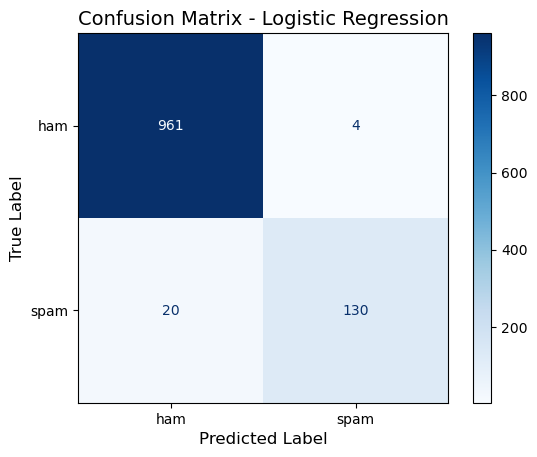

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=['ham','spam'])
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d') 
plt.title("Confusion Matrix - Logistic Regression", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.grid(False)  # Remove grid for cleaner look
plt.show()

# SVM = 98%

In [22]:
accs = [98]

In [23]:
import pickle

In [24]:
with open("svm.pkl", 'wb') as f:
    pickle.dump(grid, f)

In [25]:
with open("tf-idf.pkl", 'wb') as f:
    pickle.dump(pipeline['tf-idf'],f)
with open("bow.pkl", 'wb') as f:
    pickle.dump(pipeline['bow'],f)

# KNN

In [26]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': np.arange(1,30)}
grid2 = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=3)
grid2.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.945 total time=   0.1s
[CV 2/5] END .....................n_neighbors=1;, score=0.937 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.949 total time=   0.1s
[CV 4/5] END .....................n_neighbors=1;, score=0.937 total time=   0.1s
[CV 5/5] END .....................n_neighbors=1;, score=0.945 total time=   0.1s
[CV 1/5] END .....................n_neighbors=2;, score=0.924 total time=   0.1s
[CV 2/5] END .....................n_neighbors=2;, score=0.917 total time=   0.1s
[CV 3/5] END .....................n_neighbors=2;, score=0.925 total time=   0.1s
[CV 4/5] END .....................n_neighbors=2;, score=0.911 total time=   0.1s
[CV 5/5] END .....................n_neighbors=2;, score=0.918 total time=   0.1s
[CV 1/5] END .....................n_neighbors=3;, score=0.924 total time=   0.1s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             verbose=3)

In [27]:
with open("knn.pkl", 'wb') as f:
    pickle.dump(grid2, f)

In [28]:
grid_predictions = grid2.predict(x_test_transformed)
print(confusion_matrix(y_test,grid_predictions))

[[965   0]
 [ 63  87]]


<Figure size 600x500 with 0 Axes>

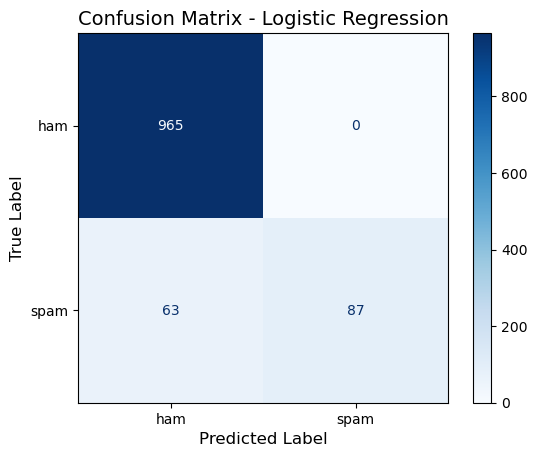

In [29]:
cm = confusion_matrix(y_test, grid_predictions)
disp = ConfusionMatrixDisplay(cm, display_labels=['ham','spam'])
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d') 
plt.title("Confusion Matrix - Logistic Regression", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.grid(False)  # Remove grid for cleaner look
plt.show()

# KNN = 94%

In [30]:
accs.append(94)

# RFC

In [31]:
from sklearn.ensemble import RandomForestClassifier
grid3 = RandomForestClassifier(n_estimators=100)
grid3.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [32]:
grid_predictions = grid3.predict(x_test_transformed)
print(confusion_matrix(y_test,grid_predictions))

[[965   0]
 [ 29 121]]


In [33]:
cm = confusion_matrix(y_test, grid_predictions)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



<Figure size 600x500 with 0 Axes>

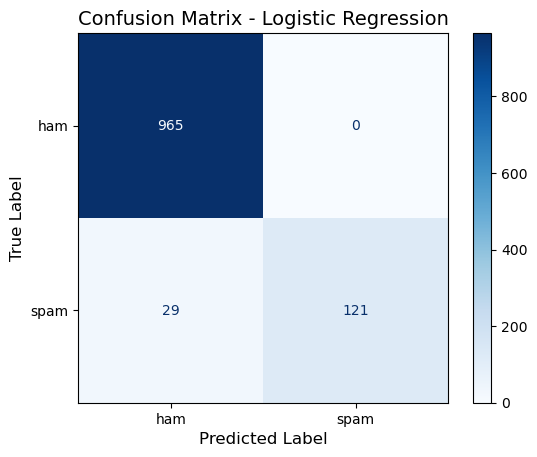

In [34]:
disp = ConfusionMatrixDisplay(cm, display_labels=['ham','spam'])
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d') 
plt.title("Confusion Matrix - Logistic Regression", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.grid(False)  # Remove grid for cleaner look
plt.show()

# RFC = 97%

In [35]:
accs.append(97)

In [36]:
grid3

RandomForestClassifier()

In [37]:
with open("rfc.pkl", 'wb') as f:
    pickle.dump(grid3, f)

# MultinomialNB

In [38]:
from sklearn.naive_bayes import MultinomialNB
# assuming X_train, X_test, y_train, y_test are already defined
param_grid = {
    'fit_prior': [True, False],
    'alpha': [0.1, 0.5, 1.0, 2.0, 3.0, 3.5, 4.0],
    'class_prior': [None, [0.1, 0.9], [0.5, 0.5], [0.9, 0.1]]
}
grid4 = GridSearchCV(MultinomialNB(),param_grid,refit=True,verbose=3)
grid4.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.979 total time=   0.0s
[CV 2/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.982 total time=   0.0s
[CV 3/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.973 total time=   0.0s
[CV 4/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.973 total time=   0.0s
[CV 5/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.966 total time=   0.0s
[CV 1/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.895 total time=   0.0s
[CV 2/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.901 total time=   0.0s
[CV 3/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.914 total time=   0.0s
[CV 4/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.897 total time=   0.0s
[CV 5/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.901 total time=   0.0s
[CV 1/5] END alpha=0.1, class_pri

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 3.0, 3.5, 4.0],
                         'class_prior': [None, [0.1, 0.9], [0.5, 0.5],
                                         [0.9, 0.1]],
                         'fit_prior': [True, False]},
             verbose=3)

In [39]:
grid_predictions = grid4.predict(x_test_transformed)
cm = confusion_matrix(y_test, grid_predictions)
print(cm)

[[964   1]
 [ 20 130]]


<Figure size 600x500 with 0 Axes>

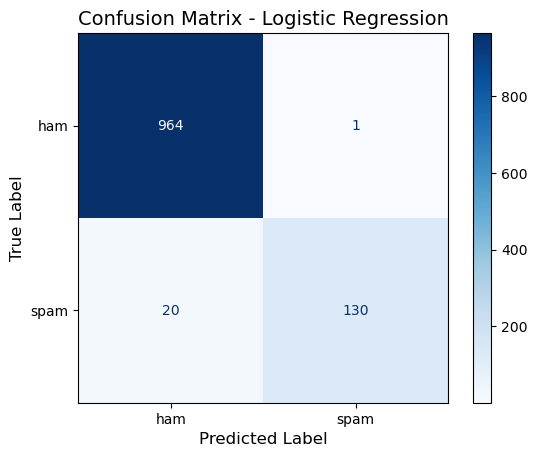

In [40]:
disp = ConfusionMatrixDisplay(cm, display_labels=['ham','spam'])
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d') 
plt.title("Confusion Matrix - Logistic Regression", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.grid(False)  # Remove grid for cleaner look
plt.show()

# MultinomialNB = 98%

In [41]:
accs.append(98)

In [42]:
grid4

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 3.0, 3.5, 4.0],
                         'class_prior': [None, [0.1, 0.9], [0.5, 0.5],
                                         [0.9, 0.1]],
                         'fit_prior': [True, False]},
             verbose=3)

In [43]:
with open("nb.pkl", 'wb') as f:
    pickle.dump(grid4, f)

In [44]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/noumannomi123/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

/home/noumannomi123/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


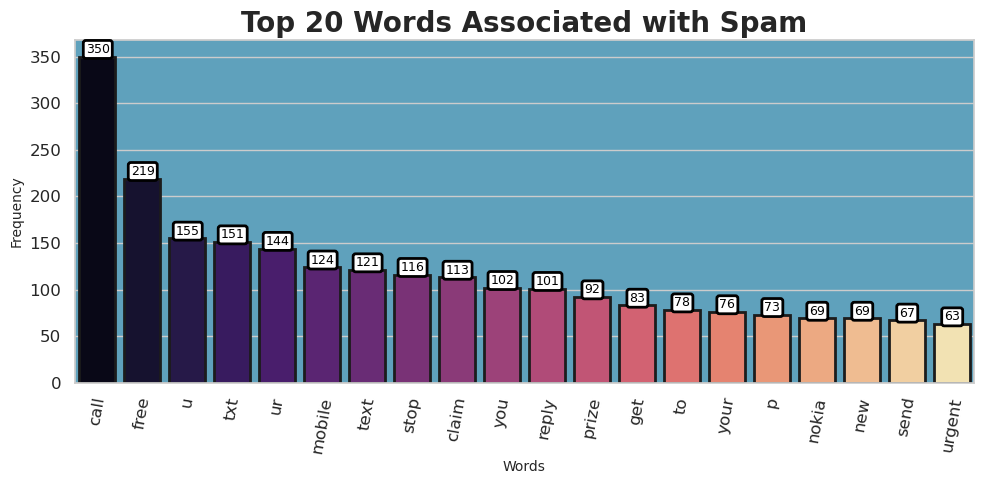

In [45]:
spam_texts = df[df['label'] == 'spam']['text']
from nltk.tokenize import word_tokenize
from collections import Counter
# Tokenize the text and count the frequency of each word
words = [word.lower() for text in spam_texts for word in word_tokenize(text)]
word_freq = Counter(words)

# Get the top 20 words
top_20_words = dict(word_freq.most_common(20))

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Create a bar plot
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with Spam", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

/home/noumannomi123/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


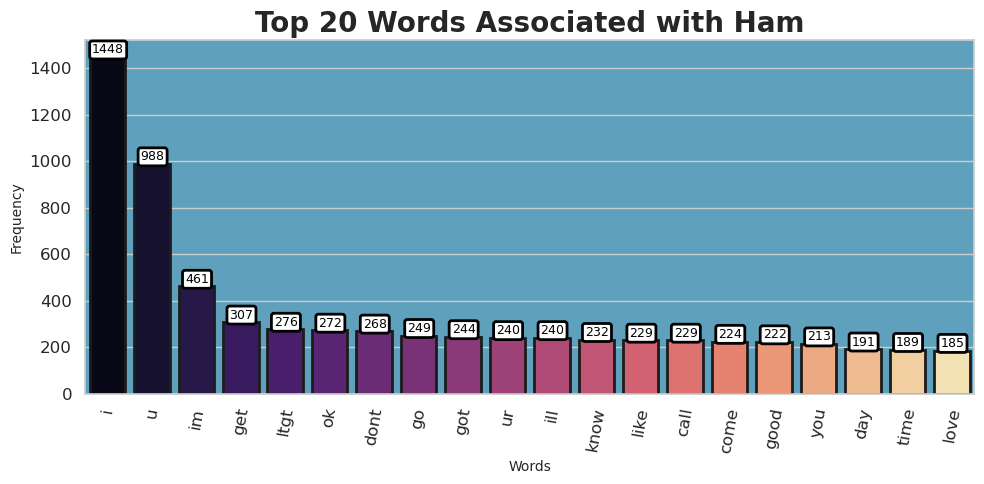

In [46]:
ham_texts = df[df['label'] == 'ham']['text']

# Tokenize the text and count the frequency of each word
words = [word.lower() for text in ham_texts for word in word_tokenize(text)]
word_freq = Counter(words)

# Get the top 20 words
top_20_words = dict(word_freq.most_common(20))

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Create a bar plot
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with Ham", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

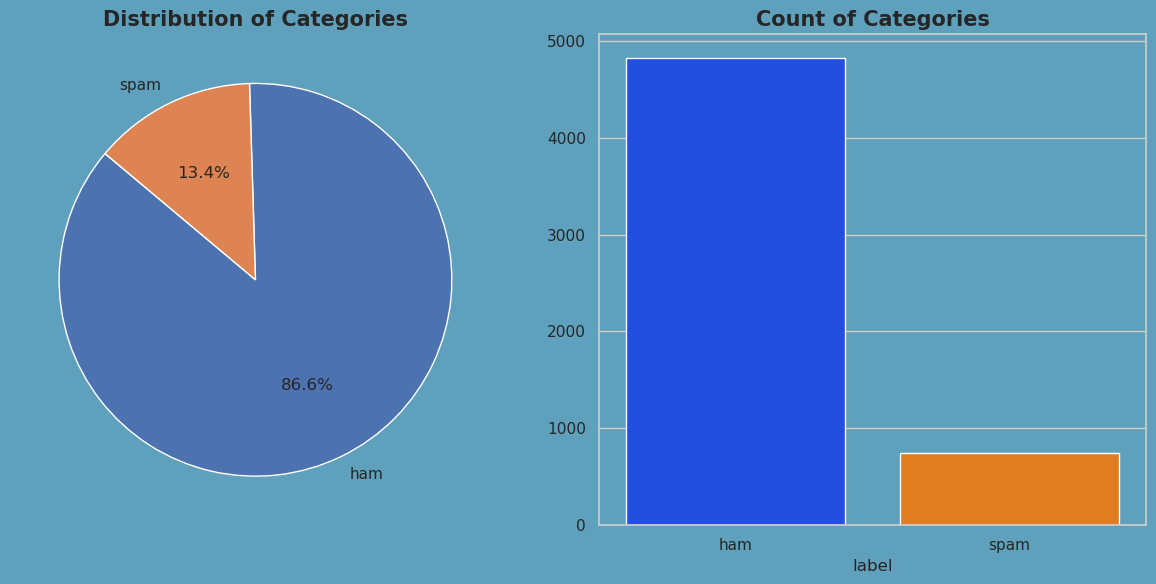

In [47]:
# Value count of 'label'
count = df['label'].value_counts()

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color, 'figure.facecolor': background_color})

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor=background_color)

# Plot pie chart on the first subplot
palette = sns.color_palette("bright", len(count))
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories', fontsize=15, fontweight='bold')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)
axs[1].set_title('Count of Categories', fontsize=15, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

SVM
KNN
RFC
MultinomialNB

In [48]:
accs = accs
models = ['SVM', 'KNN', 'RFC', 'MultinomialNB']

<Axes: xlabel='Model', ylabel='Accuracy'>

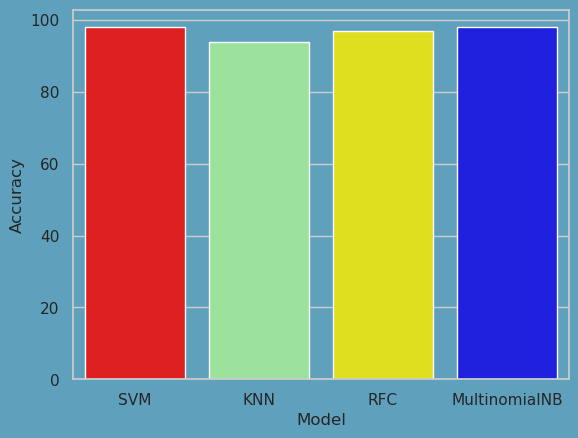

In [49]:
# Plot
# plt.figure(figsize=(8, 5))
# plt.bar(models, accs, edgecolor='black')
# plt.title('Accuracy Comparison of Models', fontsize=14)
# plt.xlabel('Models', fontsize=12)
# plt.ylabel('Accuracy (%)', fontsize=12)
# plt.ylim(0, 100)  # Ensure percentages range from 0 to 100
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.savefig("Accuracies.png")
# plt.show() 
data = pd.DataFrame({'Model': models, 'Accuracy': accs})
sns.barplot(data,x='Model', y='Accuracy',palette=['red','lightgreen','yellow','blue'])